# Stanford CME 241 (Winter 2026) - Assignment 2

**Due: Friday, February 13 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/yuxiang-jack-zhang/CME241/blob/master/assignment2/assignment2.ipynb

*Group members (replace below names with people in your group):* 
- Jack Zhang
- Jeffrey Xue
- Patrick Flanagan

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Job-Hopping and Wages-Utility-Maximization (Led by Jack Zhang)

You are a worker who starts every day either employed or unemployed. If you start your day employed, you work on your job for the day (one of $n$ jobs, as elaborated later) and you get to earn the wage of the job for the day. However, at the end of the day, you could lose your job with probability $\alpha \in [0,1]$, in which case you start the next day unemployed. If at the end of the day, you do not lose your job (with probability $1-\alpha$), then you will start the next day with the same job (and hence, the same daily wage). 

On the other hand, if you start your day unemployed, then you will be randomly offered one of $n$ jobs with daily wages $w_1, w_2, \ldots w_n \in \mathbb{R}^+$ with respective job-offer probabilities $p_1, p_2, \ldots p_n \in [0,1]$ (with $\sum_{i=1}^n p_i = 1$). You can choose to either accept or decline the offered job. If you accept the job offer, your day progresses exactly like the **employed-day** described above (earning the day's job wage and possibly (with probability $\alpha$) losing the job at the end of the day). However, if you decline the job offer, you spend the day unemployed, receive the unemployment wage $w_0 \in \mathbb{R}^+$ for the day, and start the next day unemployed.

The problem is to identify the optimal choice of accepting or rejecting any of the job offers the worker receives, in a manner that maximizes the infinite-horizon **Expected Discounted-Sum of Wages Utility**. Assume the daily discount factor for wages (employed or unemployed) is $\gamma \in [0,1])$. Assume Wages Utility function to be $U(w) = \log(w)$ for any wage amount $w \in \mathbb{R}^+$. The goal is to maximize:

$$
\mathbb{E}\left[\sum_{u=t}^\infty \gamma^{u-t} \cdot \log(w_{i_u})\right]
$$

at the start of a given day $t$ ($w_{i_u}$ is the wage earned on day $u$, $0 \leq i_u \leq n$ for all $u \geq t$).

---

### Subquestions

#### Part (A): MDP Modeling

Express the job-hopping problem as an MDP using clear mathematical notation by defining the following components:

1. **State Space**: Define the possible states of the MDP.
2. **Action Space**: Specify the actions available to the worker at each state.
3. **Transition Function**: Describe the probabilities of transitioning between states for each action.
4. **Reward Function**: Specify the reward associated with the states and transitions.
5. **Bellman Optimality Equation**: Write the Bellman Optimality Equation customized for this MDP.

---

#### Part (B): Python Implementation

Write Python code that:

1. Solves the Bellman Optimality Equation (hence, solves for the **Optimal Value Function** and the **Optimal Policy**) with a numerical iterative algorithm. 
2. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

*Note*: For this problem, write the algorithm from scratch without using any prebuilt MDP/DP libraries or code.

---

#### Part (C): Visualization and Analysis

1. Plot the **Optimal Value Function** as a function of the state for a specific set of parameters ($n$, $w_1, \ldots, w_n$, $p_1, \ldots, p_n$, $\alpha$, $\gamma$, $w_0$).
2. Include these graphs in your submission.

---

#### Part (D): Observations

1. What patterns do you observe in the **Optimal Policy** as you vary the parameters $n$, $\alpha$, and $\gamma$?
2. Provide a brief discussion of your findings.

---

### Part (A) Answer
1. State Space

$$S = \{E_1, E_2, \ldots, E_n\} \;\cup\; \{U_1, U_2, \ldots, U_n\}$$

$E_i$ are employed states. The worker is employed at job $i$ at the start of the day $(i = 1, \ldots, n)$.

$U_j$ are unemployed states. The worker is unemployed and has been offered job $j$ at the start of the day $(j = 1, \ldots, n)$.



2. Action Space

$$\;\mathcal{A}(E_i) = \{\text{Work}\}$$
$$\;\mathcal{A}(U_j) = \{\text{Accept},\; \text{Decline}\}$$

When employed, the worker has to work it. When unemployed, the worker can choose to accept or decline the job offer.



3. Reward Function

$$R(E_i, \text{Work}) = \log(w_i)$$
$$R(U_j, \text{Accept}) = \log(w_j)$$
$$R(U_j, \text{Decline}) = \log(w_0)$$



4. Transition Function

From employed state $E_i$, action is always Work. If transition into unemployed state, then will get offered a job $k\in\{1, \ldots, n\}$ with $p_k$.
$$P(E_i \mid E_i, \text{Work}) = 1 - \alpha$$
$$P(U_k \mid E_i, \text{Work}) = \alpha \cdot p_k \quad \text{for } k = 1, \ldots, n$$

From unemployed-offered state $U_j$, action can be accept or decline.
$$P(E_j \mid U_j, \text{Accept}) = 1 - \alpha$$
$$P(U_k \mid U_j, \text{Accept}) = \alpha \cdot p_k \quad \text{for } k = 1, \ldots, n$$
$$P(U_k \mid U_j, \text{Decline}) = p_k \quad \text{for } k = 1, \ldots, n$$



5. Bellman Optimality Equation

Define the expected value of the unemployed state before the job offer is revealed, which is expected value of all the possible jobs that could be offered: $\bar{V}_U = \sum_{k=1}^n p_k \, V^*(U_k)$ .

When Employed at job $i = 1, \ldots, n$, we're in state $E_i$, and there is no choice but to work, so
$$V^*(E_i) = \log(w_i) + \gamma \Big[(1-\alpha)\, V^*(E_i) + \alpha\, \bar{V}_U\Big]$$

$$V^*(E_i) = \frac{\log(w_i) + \gamma\, \alpha\, \bar{V}_U}{1 - \gamma(1-\alpha)}$$

Now, when Unemployed and has offer for job $j = 1, \ldots, n$ (we're in state $U_j$), we want to take the action that maximizes $V$.

$$V^*(U_j) = \max\!\Big\{\log(w_j) + \gamma\big[(1-\alpha)\,V^*(E_j) + \alpha\,\bar{V}_U\big],\;\; \log(w_0) + \gamma\,\bar{V}_U\Big\}$$

The first part of the max function can be rewritten as $V^*(E_j)$, so we have
$$V^*(U_j) = \max\!\Big\{V^*(E_j),\;\; \log(w_0) + \gamma\,\bar{V}_U\Big\}$$
And this is our Bellman Equation.

### Part (B) Answer

In [3]:
from typing import List, Tuple, Dict

def solve_job_hopping(
    n: int,
    wages: List[float],
    probs: List[float],
    alpha: float,
    gamma: float,
    w0: float,
    tol: float = 1e-12,
    max_iter: int = 100000
) -> Tuple[Dict[str, float], Dict[str, str]]:

    # array of rewards for each job, which is just log(w_i)
    log_w = np.log(np.array(wages, dtype=float))    
    # unemployed reward is just log(w_0)
    log_w0 = np.log(float(w0))
    # offer probabilities
    p = np.array(probs, dtype=float)                 

    # value iteration to find V_U_bar
    V_U_bar = 0.0

    for iteration in range(max_iter):
        # closed-form V*(E_i) given current V_U_bar
        V_E = (log_w + gamma * alpha * V_U_bar) / (1.0 - gamma * (1.0 - alpha))

        # value of declining any offer
        V_decline = log_w0 + gamma * V_U_bar

        # V*(U_j) = max(V*(E_j), V_decline)
        V_U_states = np.maximum(V_E, V_decline)

        # update: V_U_bar = sum_j p_j * V*(U_j)
        V_U_bar_new = float(p @ V_U_states)

        # convergence check
        if abs(V_U_bar_new - V_U_bar) < tol:
            V_U_bar = V_U_bar_new
            break
        V_U_bar = V_U_bar_new

    # final computation with the V_U_bar we just found
    V_E = (log_w + gamma * alpha * V_U_bar) / (1.0 - gamma * (1.0 - alpha))
    V_decline = log_w0 + gamma * V_U_bar
    V_U_states = np.maximum(V_E, V_decline)

    # package results
    value_function: Dict[str, float] = {}
    policy: Dict[str, str] = {}
    for i in range(n):
        value_function[f'Employed_{i}'] = float(V_E[i])
        value_function[f'Offered_{i}'] = float(V_U_states[i])
        policy[f'Offered_{i}'] = 'Accept' if V_E[i] >= V_decline else 'Decline'

    return value_function, policy

### Part (C) Answer

In [4]:
# testing our solver on a simple example
n = 10
wages = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
probs = [1 / n] * n # uniform offer probabilities
alpha = 0.1 # 10% daily job-loss probability
gamma_val = 0.95 # discount factor
w0 = 5.0 # unemployment wage

vf, pol = solve_job_hopping(n, wages, probs, alpha, gamma_val, w0)

print("Optimal Value Function:")
for state in sorted(vf.keys()):
    print(f"  {state:20s}: {vf[state]:10.4f}")

print("")

print("Optimal Policy (for job offers when unemployed):")
for state in sorted(pol.keys()):
    print(f"  {state:20s}: {pol[state]}")

Optimal Value Function:
  Employed_0          :    69.0013
  Employed_1          :    73.7816
  Employed_2          :    76.5780
  Employed_3          :    78.5620
  Employed_4          :    80.1009
  Employed_5          :    81.3583
  Employed_6          :    82.4214
  Employed_7          :    83.3423
  Employed_8          :    84.1546
  Employed_9          :    84.8812
  Offered_0           :    78.6355
  Offered_1           :    78.6355
  Offered_2           :    78.6355
  Offered_3           :    78.6355
  Offered_4           :    80.1009
  Offered_5           :    81.3583
  Offered_6           :    82.4214
  Offered_7           :    83.3423
  Offered_8           :    84.1546
  Offered_9           :    84.8812

Optimal Policy (for job offers when unemployed):
  Offered_0           : Decline
  Offered_1           : Decline
  Offered_2           : Decline
  Offered_3           : Decline
  Offered_4           : Accept
  Offered_5           : Accept
  Offered_6           : Accept
  Off

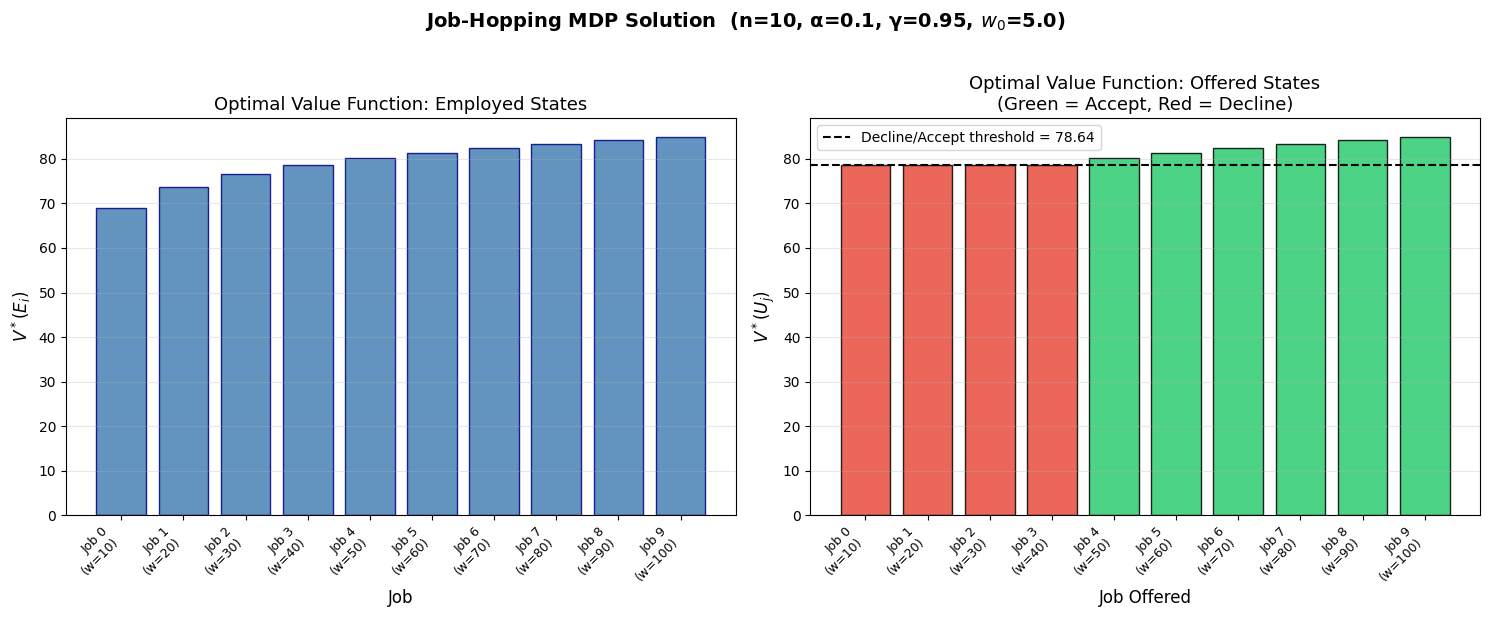

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# extract values in job order
V_E_vals = [vf[f'Employed_{i}'] for i in range(n)]
V_U_vals = [vf[f'Offered_{i}'] for i in range(n)]
actions  = [pol[f'Offered_{i}'] for i in range(n)]
colors_bar = ['#2ecc71' if a == 'Accept' else '#e74c3c' for a in actions]

x = np.arange(n)
labels = [f'Job {i}\n(w={int(wages[i])})' for i in range(n)]

# left subplot: V*(E_i) for each job
axes[0].bar(x, V_E_vals, color='steelblue', edgecolor='navy', alpha=0.85)
axes[0].set_xlabel('Job', fontsize=12)
axes[0].set_ylabel('$V^*(E_i)$', fontsize=12)
axes[0].set_title('Optimal Value Function: Employed States', fontsize=13)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[0].grid(axis='y', alpha=0.3)

# right subplot: V*(U_j) colored by accept/decline
V_U_bar = sum(probs[i] * V_U_vals[i] for i in range(n))
V_decline = np.log(w0) + gamma_val * V_U_bar # threshold V value for accept/decline

axes[1].bar(x, V_U_vals, color=colors_bar, edgecolor='black', alpha=0.85)
axes[1].axhline(y=V_decline, color='black', linestyle='--', linewidth=1.5,
                label=f'Decline/Accept threshold = {V_decline:.2f}')
axes[1].set_xlabel('Job Offered', fontsize=12)
axes[1].set_ylabel('$V^*(U_j)$', fontsize=12)
axes[1].set_title('Optimal Value Function: Offered States\n(Green = Accept, Red = Decline)', fontsize=13)
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle(
    f'Job-Hopping MDP Solution  (n={n}, α={alpha}, γ={gamma_val}, $w_0$={w0})',
    fontsize=14, fontweight='bold', y=1.02
)
plt.tight_layout()
plt.show()


### Part (D) Answer

$\alpha$ is the job loss probability. When $\alpha$ is high, the worker is likely to lose any accepted job. This reduces the long-run value of being employed, so the acceptance threshold drops and the worker is more willing to accept low wage jobs. When $\alpha$ is low, the worker can keep their job for a lot longer time, so the worker can affort to be picky and wait for a higher-wage job.


$\gamma$ is the discount factor. A high $\gamma$ means future earnings means a lot to the worker, while a low $\gamma$ means the worker values the present a lot more.
So when we increase $\gamma$, the worker is more okay with sacraficing current wage for a higher future wage by waiting for a better job, which results in higher acceptance threshold. On the other hand, when we decrease $\gamma$, the worker just wants money currently so they are more willing to accept any job that come their way. 

$n$ is the number of jobs that exist. Since we kept wages as linearly increments in the range $[10, 100]$, increasing $n$ adds more granularity to the list of wage but does not significantly change the acceptance threshold. I think the threshold will depend more on the distribution of wages, so for example if there are more high-paying jobs then the threshold will be higher since the worker wants to wait until they get one of the good ones.

In [6]:
def get_acceptance_info(n, wages, probs, alpha, gamma, w0):
    """Helper: returns (list of accepted job indices, minimum accepted wage)."""
    _, policy = solve_job_hopping(n, wages, probs, alpha, gamma, w0)
    accepted = [i for i in range(n) if policy[f'Offered_{i}'] == 'Accept']
    min_wage = min(wages[i] for i in accepted) if accepted else None
    return accepted, min_wage

# vary alpha
print("Varying alpha (keep gamma=0.95):")
for a in [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0]:
    accepted, min_w = get_acceptance_info(n, wages, probs, a, 0.95, w0)
    print(f"alpha={a:.2f}: {len(accepted)}/{n} accepted, min wage to accept={min_w}")

print("")

print("Varying gamma (keep alpha=0.1):")
for g in [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]:
    accepted, min_w = get_acceptance_info(n, wages, probs, 0.1, g, w0)
    print(f"gamma={g:.2f}: {len(accepted)}/{n} accepted, min wage to accept={min_w}")

print("")

print("Varying n (keep alpha=0.1, gamma=0.95):")
for nn in [3, 5, 10, 20, 50]:
    w_test = np.linspace(10, 100, nn).tolist()
    p_test = [1.0 / nn] * nn
    accepted, min_w = get_acceptance_info(nn, w_test, p_test, 0.1, 0.95, w0)
    print(f"n={nn}: {len(accepted)}/{nn} accepted, min wage to accept={min_w:.1f}" if min_w else f"  n={nn}: 0/{nn} accepted")

Varying alpha (keep gamma=0.95):
alpha=0.01: 5/10 accepted, min wage to accept=60
alpha=0.05: 6/10 accepted, min wage to accept=50
alpha=0.10: 6/10 accepted, min wage to accept=50
alpha=0.20: 8/10 accepted, min wage to accept=30
alpha=0.50: 9/10 accepted, min wage to accept=20
alpha=0.80: 10/10 accepted, min wage to accept=10
alpha=1.00: 10/10 accepted, min wage to accept=10

Varying gamma (keep alpha=0.1):
gamma=0.10: 10/10 accepted, min wage to accept=10
gamma=0.30: 10/10 accepted, min wage to accept=10
gamma=0.50: 9/10 accepted, min wage to accept=20
gamma=0.70: 8/10 accepted, min wage to accept=30
gamma=0.90: 7/10 accepted, min wage to accept=40
gamma=0.95: 6/10 accepted, min wage to accept=50
gamma=0.99: 6/10 accepted, min wage to accept=50

Varying n (keep alpha=0.1, gamma=0.95):
n=3: 2/3 accepted, min wage to accept=55.0
n=5: 3/5 accepted, min wage to accept=55.0
n=10: 6/10 accepted, min wage to accept=50.0
n=20: 13/20 accepted, min wage to accept=43.2
n=50: 33/50 accepted, min 

## Question 2: Two-Stores Inventory Control (Led by Jack Zhang)

We extend the capacity-constrained inventory example implemented in [rl/chapter3/simple_inventory_mdp_cap.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter3/simple_inventory_mdp_cap.py) as a `FiniteMarkovDecisionProcess` (the Finite MDP model for the capacity-constrained inventory example is described in detail in Chapters 1 and 2 of the RLForFinanceBook). Here we assume that we have two different stores, each with their own separate capacities $C_1$ and $C_2$, their own separate Poisson probability distributions of demand (with means $\lambda_1$ and $\lambda_2$), their own separate holding costs $h_1$ and $h_2$, and their own separate stockout costs $p_1$ and $p_2$. At 6pm upon stores closing each evening, each store can choose to order inventory from a common supplier (as usual, ordered inventory will arrive at the store 36 hours later). We are also allowed to transfer inventory from one store to another, and any such transfer happens overnight, i.e., will arrive by 6am next morning (since the stores are fairly close to each other). Note that the orders are constrained such that following the orders on each evening, each store's inventory position (sum of on-hand inventory and on-order inventory) cannot exceed the store's capacity (this means the action space is constrained to be finite). Each order made to the supplier incurs a fixed transportation cost of $K_1$ (fixed-cost means the cost is the same no matter how many units of non-zero inventory a particular store orders). Moving any non-zero inventory between the two stores incurs a fixed transportation cost of $K_2$. 

Model this as a derived class of `FiniteMarkovDecisionProcess` much like we did for `SimpleInventoryMDPCap` in the code repo. Set up instances of this derived class for different choices of the problem parameters (capacities, costs etc.), and determine the Optimal Value Function and Optimal Policy by invoking the function `value_iteration` (or `policy_iteration`) from file [rl/dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/dynamic_programming.py).

Analyze the obtained Optimal Policy and verify that it makes intuitive sense as a function of the problem parameters.

### Answer: 

We experimented with three setups. 1) Low transfer cost ($K_2=0.5$), 2) high transfer cost ($K_2=10$), and 3) asymmetric demand ($\lambda_1=2, \lambda_2=0.5$). And the optimal policy make intuitive sense in each case.

In 1) low transfer cost, both stores order roughly the same number of units, and sometimes transfer as it's cheap to do so, to balance out the inventory next day if one store has excess on-hand inventory and the other is depleted.

In 2) high transfer cost, no transfers take place since transfers are so expensive that ordering independently ended up always being better. Essentially, the two stores become independent stores, like two copies of the one store problem, since a super expensive transfer cost could be the two stores are located on different continents and they might as well be considered two separate problem setups.

In 3) assymetric demand, transfer cost is $1.0$, still relatively cheap, and we see frequent transfers from store 2 to store 1 in order to satisfy the higher demand in store 1, since transfer is faster (overnight) than ordering.

In [9]:
from dataclasses import dataclass
from typing import Tuple, Dict
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.distribution import Categorical
from rl.dynamic_programming import value_iteration_result
from rl.markov_process import NonTerminal
from scipy.stats import poisson as poisson_dist
import numpy as np
import matplotlib.pyplot as plt

@dataclass(frozen=True)
class TwoStoreState:
    """
    State of the two-store system include onhand inventory and onorder inventory
    oh1, oh2: on-hand inventory (after today's demand)
    oo1, oo2: on-order from supplier (arriving next morning, 6am)
    Capacity constraint is oh_i + oo_i  <=  C_i, where C_i is capacity of store i
    """
    oh1: int
    oo1: int
    oh2: int
    oo2: int


@dataclass(frozen=True)
class TwoStoreAction:
    """
    order1, order2: units ordered from supplier for each store
    transfer: positive means number from store 1 to store 2,
              negative means number from store 2 to store 1
    """
    order1: int
    order2: int
    transfer: int

class TwoStoreInventoryMDP(FiniteMarkovDecisionProcess[TwoStoreState, TwoStoreAction]):
    """
    Parameters:
    C1, C2: store capacities
    lam1, lam2: lambda for Poisson demand means
    h1, h2: per-unit holding costs for on-hand at 6pm
    p1, p2: per-unit stockout costs for unmet demand
    K1: fixed cost per supplier order for each store independently
    K2: fixed cost for any non-zero inter-store transfer
    """

    def __init__(self, C1: int, C2: int,
                 lam1: float, lam2: float,
                 h1: float, h2: float,
                 p1: float, p2: float,
                 K1: float, K2: float):
        self.C1, self.C2 = C1, C2
        self.lam1, self.lam2 = lam1, lam2
        self.h1, self.h2 = h1, h2
        self.p1, self.p2 = p1, p2
        self.K1, self.K2 = K1, K2
        self.poi1 = poisson_dist(lam1)
        self.poi2 = poisson_dist(lam2)
        super().__init__(self._build_map())

    def _build_map(self) -> Dict[TwoStoreState,
                                  Dict[TwoStoreAction,
                                       Categorical[Tuple[TwoStoreState, float]]]]:
        mapping: Dict[TwoStoreState, Dict[TwoStoreAction, Categorical]] = {}
        for oh1 in range(self.C1 + 1):
            for oo1 in range(self.C1 + 1 - oh1):       # oh1+oo1 <= C1
                for oh2 in range(self.C2 + 1):
                    for oo2 in range(self.C2 + 1 - oh2): # oh2+oo2 <= C2
                        s = TwoStoreState(oh1, oo1, oh2, oo2)
                        mapping[s] = self._actions_for(s)
        return mapping

    def _actions_for(self, s: TwoStoreState) -> Dict[TwoStoreAction, Categorical]:
        """Enumerate feasible (order1, order2, transfer) for state s."""
        oh1, oo1, oh2, oo2 = s.oh1, s.oo1, s.oh2, s.oo2
        # constraints:
        # t <= oh1, t >= -oh2 (can't send more than on-hand)
        # C1 - (oh1 - t) - oo1 >= 0 -> t >= oh1 + oo1 - C1
        # C2 - (oh2 + t) - oo2 >= 0 -> t <= C2 - oh2 - oo2
        t_lo = max(-oh2, oh1 + oo1 - self.C1)
        t_hi = min(oh1, self.C2 - oh2 - oo2)

        actions: Dict[TwoStoreAction, Categorical] = {}
        for t in range(t_lo, t_hi + 1):
            max_o1 = self.C1 - (oh1 - t) - oo1
            max_o2 = self.C2 - (oh2 + t) - oo2
            for o1 in range(max(0, max_o1) + 1):
                for o2 in range(max(0, max_o2) + 1):
                    a = TwoStoreAction(o1, o2, t)
                    actions[a] = self._transition(s, a)
        return actions

    def _transition(self, s: TwoStoreState, a: TwoStoreAction) -> Categorical[Tuple[TwoStoreState, float]]:
        """
        Categorical distribution over (next_state, reward).

        Timeline:
          6pm: observe state, decide (order1, order2, transfer)
          overnight: transfer units move between stores
          6am: supplier on-orders arrive; transfer arrives
                 available_i = oh_i + oo_i +/- transfer
          day: random Poisson demand d_i for each store
          6pm: new state (max(0, avail_i - d_i), order_i)

        Reward (negative cost):
          - holding:  h_i * oh_i
          - stockout: p_i * max(0, d_i - avail_i)
          - fixed ordering:  K1 per store with non-zero order
          - fixed transfer:  K2 if transfer != 0
        """
        oh1, oo1, oh2, oo2 = s.oh1, s.oo1, s.oh2, s.oo2
        o1, o2, t = a.order1, a.order2, a.transfer

        # available next morning for each store
        avail1 = oh1 + oo1 - t
        avail2 = oh2 + oo2 + t

        # fixed reward (independent of demand)
        base_r = -(self.h1 * oh1 + self.h2 * oh2)
        if o1 > 0:
            base_r -= self.K1
        if o2 > 0:
            base_r -= self.K1
        if t != 0:
            base_r -= self.K2

        # P(D_i >= avail_i), E[D_i - avail_i | D_i >= avail_i]
        # Poisson identity: E[D-a | D>=a] = lam - a(1 - pmf(a)/P(D>=a))
        tp1 = 1 - self.poi1.cdf(avail1 - 1) if avail1 > 0 else 1.0
        tp2 = 1 - self.poi2.cdf(avail2 - 1) if avail2 > 0 else 1.0
        ce1 = (self.lam1 - avail1 * (1 - self.poi1.pmf(avail1) / tp1)
               if avail1 > 0 and tp1 > 1e-15 else self.lam1)
        ce2 = (self.lam2 - avail2 * (1 - self.poi2.pmf(avail2) / tp2)
               if avail2 > 0 and tp2 > 1e-15 else self.lam2)

        # enumerate demand outcomes
        sr: Dict[Tuple[TwoStoreState, float], float] = {}
        for d1 in range(avail1 + 1):
            if d1 < avail1:
                pr1, ec1, noh1 = self.poi1.pmf(d1), 0.0, avail1 - d1
            else:
                pr1, ec1, noh1 = tp1, self.p1 * ce1, 0
            if pr1 < 1e-15:
                continue

            for d2 in range(avail2 + 1):
                if d2 < avail2:
                    pr2, ec2, noh2 = self.poi2.pmf(d2), 0.0, avail2 - d2
                else:
                    pr2, ec2, noh2 = tp2, self.p2 * ce2, 0
                pr = pr1 * pr2
                if pr < 1e-15:
                    continue

                ns = TwoStoreState(noh1, o1, noh2, o2)
                r  = base_r - ec1 - ec2
                key = (ns, r)
                sr[key] = sr.get(key, 0.0) + pr

        return Categorical(sr)

In [10]:
gamma = 0.9

# three different setups to test our model on
configs = {
    "Low K2=0.5 (cheap transfers)": dict(
        C1=3, C2=3, lam1=1.0, lam2=1.0,
        h1=1.0, h2=1.0, p1=10.0, p2=10.0, K1=2.0, K2=0.5),
    "High K2=10 (expensive transfers)": dict(
        C1=3, C2=3, lam1=1.0, lam2=1.0,
        h1=1.0, h2=1.0, p1=10.0, p2=10.0, K1=2.0, K2=10.0),
    "Asymmetric demand (lam1=2, lam2=0.5)": dict(
        C1=3, C2=3, lam1=2.0, lam2=0.5,
        h1=1.0, h2=1.0, p1=10.0, p2=10.0, K1=2.0, K2=1.0),
}

key_states = [
    TwoStoreState(0, 0, 0, 0),
    TwoStoreState(1, 0, 1, 0),
    TwoStoreState(2, 0, 0, 0),
    TwoStoreState(0, 0, 2, 0),
    TwoStoreState(3, 0, 0, 0),
    TwoStoreState(0, 0, 3, 0),
    TwoStoreState(1, 1, 1, 1),
    TwoStoreState(0, 1, 0, 1),
]

results = {}

for label, params in configs.items():
    mdp = TwoStoreInventoryMDP(**params)
    vf, pol = value_iteration_result(mdp, gamma)
    results[label] = (mdp, vf, pol, params)

    n_transfer = sum(1 for s in pol.action_for if pol.action_for[s].transfer != 0)

    print(f"\n{label} ({n_transfer}/{len(pol.action_for)} states use transfer):")
    for s in key_states:
        a = pol.action_for[s]
        v = vf[NonTerminal(s)]
        print(f"  ({s.oh1},{s.oo1},{s.oh2},{s.oo2}): o1={a.order1}, o2={a.order2}, t={a.transfer:+d}, V*={v:.1f}")


Low K2=0.5 (cheap transfers) (10/100 states use transfer):
  (0,0,0,0): o1=3, o2=3, t=+0, V*=-89.2
  (1,0,1,0): o1=2, o2=2, t=+0, V*=-81.1
  (2,0,0,0): o1=2, o2=2, t=+1, V*=-81.6
  (0,0,2,0): o1=2, o2=2, t=-1, V*=-81.6
  (3,0,0,0): o1=1, o2=2, t=+1, V*=-81.1
  (0,0,3,0): o1=1, o2=2, t=-2, V*=-81.1
  (1,1,1,1): o1=0, o2=1, t=+0, V*=-77.8
  (0,1,0,1): o1=2, o2=2, t=+0, V*=-79.1

High K2=10 (expensive transfers) (0/100 states use transfer):
  (0,0,0,0): o1=3, o2=3, t=+0, V*=-90.9
  (1,0,1,0): o1=2, o2=2, t=+0, V*=-82.8
  (2,0,0,0): o1=1, o2=3, t=+0, V*=-86.2
  (0,0,2,0): o1=3, o2=1, t=+0, V*=-86.2
  (3,0,0,0): o1=0, o2=3, t=+0, V*=-85.6
  (0,0,3,0): o1=3, o2=0, t=+0, V*=-85.6
  (1,1,1,1): o1=1, o2=1, t=+0, V*=-79.6
  (0,1,0,1): o1=2, o2=2, t=+0, V*=-80.8

Asymmetric demand (lam1=2, lam2=0.5) (34/100 states use transfer):
  (0,0,0,0): o1=3, o2=3, t=+0, V*=-120.9
  (1,0,1,0): o1=2, o2=2, t=+0, V*=-113.6
  (2,0,0,0): o1=1, o2=3, t=+0, V*=-114.0
  (0,0,2,0): o1=2, o2=2, t=-1, V*=-114.6
  (3,

## Question 3: Dynamic Price Optimization (Led by Jeffrey Xue)

You own a supermarket, and you are $T$ days away from Halloween 🎃. You have just received $M$ Halloween masks from your supplier. You want to dynamically set the selling price of the Halloween masks at the start of each day in a manner that maximizes your **Expected Total Sales Revenue** for Halloween masks this season (assume no one will buy Halloween masks after Halloween).

Assume that for each of the $T$ days, you are required to select a price for that day from one of $N$ prices $p_1, p_2, \dots, p_N \in \mathbb{R}$, and that price is the selling price for all masks on that day. Assume that the customer demand for the number of Halloween masks on any day is governed by a Poisson probability distribution with mean $\lambda_i \in \mathbb{R}$ if you select that day’s price to be $p_i$ (where $i$ is a choice among $1, 2, \dots, N$).

Note that on any given day, the demand could exceed the number of Halloween masks you have in the store, in which case the number of masks sold on that day will be equal to the number of Halloween masks you had at the start of that day.

We spoke about this example in class - referencing the slides here (if needed) could be helpful!

---

### Subquestions

#### Part (A): Bellman Optimality Equation

Write the **Bellman Optimality Equation** customized to this Markov Decision Process (MDP). Essentially, you need to express the **Optimal Value Function** $v_*$ recursively based on taking the best action in the current state and based on the subsequent random customer demand that would produce the appropriate reward and take you to the next state.

**Note**: The probability mass function of a Poisson distribution with mean $\lambda \in \mathbb{R}$ is given by:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots
$$

---

#### Part (B): Boundary Conditions

To be able to solve the $v_*$ recursion, you need to know the values of $v_*$ for the boundary case (boundary states). Write down the boundary case(s) for the $v_*$ recursion.

---

#### Part (C): Numerical Solution

You can solve this $v_*$ recursion (hence, solve for the **Optimal Policy** $\pi_*$) with a numerical recursive algorithm (essentially a special form of Dynamic Programming algorithm customized to this problem). 

Write Python code for this algorithm that would enable you to dynamically set the selling price at the start of each day. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

---


### Part (A) Answer

Let's define the state as $(t, I_t)$ where $0 \leq t \leq T$ is the day number starting at 0 until day $T$ which is Halloween and $0 \leq I_t \leq M$ is the current inventory of masks on the current day. We can define the action space as the choice of a price $p_i$ for $1 \leq i \leq N$. If $t = T$ or $m = 0$, no action is possible so the action space is the empty set. The sales revenue is $\min(I_t, d_t) \cdot p_i$ where $d_t \sim \text{Poisson}(\lambda_i)$, in other words if demand is less than inventory (i.e. $d_t < I_t$) the revenue is $d_tp_i$ and if demand is at least the inventory (i.e. $d_t \geq I_t$) the revenue is $I_tp_i$.

With this setup, the Bellman Optimality Equation is:

$$ v_*(t, I_t) = \max_{i \in \{1,\ldots,N\}} \left\{ (\text{expected revenue when } d_t < I_t )+ (\text{expected revenue when } d_t \geq I_t) \right\} $$
$$ v_*(t, I_t) = \max_{i \in \{1,\ldots,N\}} \left\{ \sum_{d=0}^{I_t-1} \Pr(Poi(\lambda_i) = d) \Big[ p_i \cdot d + v_*(t+1,\, I_t-d) \Big] \;+\; \left(1 - \sum_{d=0}^{I_t-1} \Pr(Poi(\lambda_i) = d)\right) \Big[ p_i \cdot I_t + v_*(t+1,\, 0) \Big] \right\} $$
$$ v_*(t, I_t) = \max_{i \in \{1,\ldots,N\}} \left\{ \sum_{d=0}^{I_t-1} \frac{e^{-\lambda_i}\lambda_i^d}{d!} \Big[ p_i \cdot d + v_*(t+1,\, I_t-d) \Big] \;+\; \left(1 - \sum_{d=0}^{I_t-1} \frac{e^{-\lambda_i}\lambda_i^d}{d!}\right) \Big[ p_i \cdot I_t + v_*(t+1,\, 0) \Big] \right\} $$

### Part (B) Answer

When there are no days left ($t = T$), no more sales can be made regardless of inventory, so:

$$v_*(0, I_t) = 0 \quad \text{for all } I_t \in \{0, 1, \ldots, M\}.$$

When there are no masks left to sell ($I_t = 0$), no revenue can be earned regardless of how many days remain, so:

$$v_*(t, 0) = 0 \quad \text{for all } t \in \{0, 1, \ldots, T\}.$$

### Part (C) Answer

In [8]:
from typing import List, Tuple, Dict
from scipy.stats import poisson
import numpy as np

# inputs are the T, M, a list of prices, and a list of lambdas.
# outputs are the optimal expected total revenue (ie optimal value function V) and the optimal policy for each state.
def dp_recursive_algorithm(T: int, M: int, prices: List[float], lambdas: List[float]) -> Tuple[np.ndarray, Dict[Tuple[int, int], int]]:
    N = len(prices)
    V = np.zeros((T + 1, M + 1))
    policy: Dict[Tuple[int, int], int] = {}
    for t in range(1, T + 1):
        for m in range(1, M + 1):
            best_val = -np.inf
            best_action = 0
            for i in range(N):
                lam = lambdas[i]
                p = prices[i]
                expected_val = 0.0
                for d in range(m):
                    prob_d = poisson.pmf(d, lam)
                    expected_val += prob_d * (p * d + V[t - 1][m - d])
                prob_ge_m = 1.0 - poisson.cdf(m - 1, lam)
                expected_val += prob_ge_m * (p * m + V[t - 1][0])
                if expected_val > best_val:
                    best_val = expected_val
                    best_action = i
            V[t][m] = best_val
            policy[(t, m)] = best_action
    return V, policy

# example 
T = 10
M = 30
prices =  [5.0, 8.0, 10.0, 12.0, 15.0]
lambdas = [12.0, 8.0, 6.0, 4.0, 2.0]
V, policy = dp_recursive_algorithm(T, M, prices, lambdas)
print(f"Optimal expected total revenue (T={T}, M={M}): ${V[T][M]:.2f}\n")

Optimal expected total revenue (T=10, M=30): $378.45



## Question 4: Risk-Aversion and Utility Optimization under CARA Utility (Led by Patrick Flanagan)

You are tasked with analyzing the behavior of an investor who seeks to maximize their utility under **CARA Utility**. The investor has wealth $W$ and the CARA utility function:

$$
U(W) = \frac{1 - e^{-aW}}{a}, \quad a > 0,
$$

where $a$ represents the investor's **risk aversion**.

The investor allocates their wealth between:
1. A **riskless asset** with a fixed return $r$, and
2. A **risky asset** with return $R \sim \mathcal{N}(\mu, \sigma^2)$

The investor allocates a fraction $\pi$ of their wealth to the risky asset and $(1 - \pi)$ to the riskless asset. The wealth $W$ after one year is given by:

$$
W = (1 + r)(1 - \pi) + (1 + R)\pi.
$$

The goal is to analyze the investor’s optimal allocation $\pi$ to the risky asset and compute key risk-related quantities.

---

### Subquestions

#### Part (A): Expected Utility and Certainty-Equivalent Wealth

1. Derive the expression for the **expected utility** $\mathbb{E}[U(W)]$, using the given CARA utility function and assuming $R \sim \mathcal{N}(\mu, \sigma^2)$.
2. Using a Taylor expansion, approximate the **certainty-equivalent wealth** $W_{CE}$ up to second-order terms.

---

#### Part (B): Optimal Portfolio Allocation

Derive the optimal fraction $\pi^*$ of wealth to be allocated to the risky asset such that the **expected utility** $\mathbb{E}[U(W)]$ is maximized. Express $\pi^*$ in terms of $a$, $\mu$, $r$, and $\sigma^2$.

---

#### Part (C): Risk Premium

1. Using the results from Part (A), calculate the **absolute risk premium** $\pi_A = \mathbb{E}[W] - W_{CE}$.
2. Verify that $\pi_A \approx \frac{a \pi^2 \sigma^2}{2}$ for small $\sigma^2$.

---

#### Part (D): Numerical Calculations and Interpretation

Given the parameters $r = 0.02$, $\mu = 0.08$, $\sigma^2 = 0.04$, and $a = 3$:
1. Compute the optimal allocation $\pi^*$.
2. Calculate the certainty-equivalent wealth $W_{CE}$.
3. Compute the absolute risk premium $\pi_A$.
4. Interpret the results and discuss how changes in $a$ and $\sigma^2$ affect the risk premium and portfolio allocation.

---

#### Part (E): Expected Utility under Uniform Distribution

Now assume that the return of the risky asset, $R$, is no longer normally distributed. Instead, $R \sim \text{Uniform}[\alpha, \beta]$, where $\alpha$ and $\beta$ are the lower and upper bounds of the distribution, respectively.

1. Derive the new expression for the **expected utility** $\mathbb{E}[U(W)]$. Make sure to simplify your result as much as possible, and ensure that it explicitly depends on $a$, $\pi$, $\alpha$, $\beta$, and $r$.

**Hint**: Use the fact that if $W \sim \text{Uniform}[w_{\text{min}}, w_{\text{max}}]$, then:

$$
\mathbb{E}[g(W)] = \frac{1}{w_{\text{max}} - w_{\text{min}}} \int_{w_{\text{min}}}^{w_{\text{max}}} g(W) \, dW.
$$

---

### Part (A) Answer

**Simplify terminal wealth:**

$$W = (1+r)(1-\pi) + (1+R)\pi = (1+r) + \pi(R - r)$$

Since $R \sim \mathcal{N}(\mu, \sigma^2)$, terminal wealth $W$ is normally distributed:

$$W \sim \mathcal{N}\big((1+r) + \pi(\mu - r),\; \pi^2\sigma^2\big)$$

**Derive $\mathbb{E}[U(W)]$:**

$$\mathbb{E}[U(W)] = \frac{1 - \mathbb{E}[e^{-aW}]}{a}$$

Using the moment generating function of a normal random variable, $\mathbb{E}[e^{tX}] = e^{t\mathbb{E}[X] + \frac{t^2}{2}\text{Var}(X)}$, with $t = -a$:

$$\mathbb{E}[e^{-aW}] = \exp\left(-a\left[(1+r) + \pi(\mu - r)\right] + \frac{a^2 \pi^2 \sigma^2}{2}\right)$$

Therefore:

$$\mathbb{E}[U(W)] = \frac{1 - \exp\left(-a\left[(1+r) + \pi(\mu - r)\right] + \frac{a^2 \pi^2 \sigma^2}{2}\right)}{a}$$

**Certainty-equivalent wealth via Taylor expansion:**

Expand $U(W)$ around $\mathbb{E}[W]$ to second order:

$$U(W) \approx U(\mathbb{E}[W]) + U'(\mathbb{E}[W])(W - \mathbb{E}[W]) + \frac{1}{2}U''(\mathbb{E}[W])(W - \mathbb{E}[W])^2$$

Taking expectations:

$$\mathbb{E}[U(W)] \approx U(\mathbb{E}[W]) + \frac{1}{2}U''(\mathbb{E}[W])\,\text{Var}(W)$$

Since $W_{CE}$ satisfies $U(W_{CE}) = \mathbb{E}[U(W)]$, expanding $U(W_{CE})$ around $\mathbb{E}[W]$ to first order and equating:

$$W_{CE} \approx \mathbb{E}[W] + \frac{1}{2}\frac{U''(\mathbb{E}[W])}{U'(\mathbb{E}[W])}\,\text{Var}(W)$$

For CARA utility, $U'(W) = e^{-aW}$ and $U''(W) = -ae^{-aW}$, so $\frac{U''}{U'} = -a$. Therefore:

$$\boxed{W_{CE} \approx \mathbb{E}[W] - \frac{a}{2}\,\text{Var}(W) = (1+r) + \pi(\mu - r) - \frac{a\pi^2\sigma^2}{2}}$$

Note: for CARA utility with normally distributed wealth, this second-order approximation is exact.


### Part (B) Answer

Maximizing $\mathbb{E}[U(W)]$ is equivalent to maximizing the quantity inside the exponential (with sign flipped), which from Part (A) gives us:

$$\max_\pi \left[(1+r) + \pi(\mu - r) - \frac{a\pi^2\sigma^2}{2}\right]$$

This is the same as maximizing $W_{CE}$ with respect to $\pi$. Taking the first-order condition:

$$\frac{\partial}{\partial \pi}: \quad (\mu - r) - a\pi\sigma^2 = 0$$

Solving for $\pi$:

$$\boxed{\pi^* = \frac{\mu - r}{a\sigma^2}}$$

The second-order condition confirms this is a maximum since $\frac{\partial^2}{\partial \pi^2} = -a\sigma^2 < 0$.

**Intuition:** The optimal risky allocation increases with the excess return $(\mu - r)$ and decreases with both risk aversion $(a)$ and return variance $(\sigma^2)$.


### Part (C) Answer

**Absolute risk premium:**

$$\pi_A = \mathbb{E}[W] - W_{CE} = \left[(1+r) + \pi(\mu-r)\right] - \left[(1+r) + \pi(\mu-r) - \frac{a\pi^2\sigma^2}{2}\right]$$

$$\boxed{\pi_A = \frac{a\pi^2\sigma^2}{2}}$$

**Verification:** The Arrow-Pratt approximation states that for small risks, $\pi_A \approx \frac{1}{2}A(W)\,\text{Var}(W)$, where $A(W) = -\frac{U''(W)}{U'(W)}$ is the absolute risk aversion coefficient. For CARA utility, $A(W) = a$ (constant), and $\text{Var}(W) = \pi^2\sigma^2$, giving:

$$\pi_A \approx \frac{1}{2}\cdot a \cdot \pi^2\sigma^2 = \frac{a\pi^2\sigma^2}{2}$$

This matches exactly because CARA utility with normally distributed wealth makes the second-order Taylor approximation exact — all higher-order terms are absorbed by the exponential-normal pairing.


### Part (D) Answer

Given $r = 0.02$, $\mu = 0.08$, $\sigma^2 = 0.04$, $a = 3$:

**1. Optimal allocation:**

$$\pi^* = \frac{\mu - r}{a\sigma^2} = \frac{0.08 - 0.02}{3 \times 0.04} = \frac{0.06}{0.12} = 0.5$$

The investor allocates 50% of wealth to the risky asset.

**2. Certainty-equivalent wealth:**

$$W_{CE} = (1+r) + \pi^*(\mu - r) - \frac{a(\pi^*)^2\sigma^2}{2} = 1.02 + 0.5(0.06) - \frac{3(0.25)(0.04)}{2} = 1.035$$

**3. Absolute risk premium:**

$$\pi_A = \frac{a(\pi^*)^2\sigma^2}{2} = \frac{3(0.25)(0.04)}{2} = 0.015$$

**4. Interpretation:**

- The investor places half their wealth in the risky asset, reflecting a moderate balance between the excess return $(\mu - r = 6\%)$ and the penalty from risk aversion and variance.
- The risk premium of $0.015$ means the investor would accept a guaranteed return 1.5% lower than the expected return to eliminate all risk.
- **Increasing $a$ (more risk-averse):** $\pi^*$ decreases (invest less in risky asset) and $\pi_A$ increases (demand a larger premium for bearing risk), since the investor is more sensitive to variance.
- **Increasing $\sigma^2$ (more volatile):** $\pi^*$ also decreases (risky asset is less attractive) and $\pi_A$ increases (more uncertainty means a larger gap between expected wealth and the certainty equivalent).


### Part (E) Answer

With $R \sim \text{Uniform}[\alpha, \beta]$, terminal wealth $W = (1+r) + \pi(R - r)$ is uniformly distributed on $[W_{\min},\, W_{\max}]$ where:

$$W_{\min} = (1+r) + \pi(\alpha - r), \quad W_{\max} = (1+r) + \pi(\beta - r)$$

Using the hint, compute $\mathbb{E}[e^{-aW}]$:

$$\mathbb{E}[e^{-aW}] = \frac{1}{W_{\max} - W_{\min}} \int_{W_{\min}}^{W_{\max}} e^{-aW}\,dW = \frac{1}{W_{\max} - W_{\min}} \left[\frac{-1}{a}e^{-aW}\right]_{W_{\min}}^{W_{\max}}$$

$$= \frac{e^{-aW_{\min}} - e^{-aW_{\max}}}{a(W_{\max} - W_{\min})}$$

Since $W_{\max} - W_{\min} = \pi(\beta - \alpha)$:

$$\mathbb{E}[e^{-aW}] = \frac{e^{-a[(1+r)+\pi(\alpha - r)]} - e^{-a[(1+r)+\pi(\beta - r)]}}{a\pi(\beta - \alpha)}$$

Substituting into $\mathbb{E}[U(W)] = \frac{1 - \mathbb{E}[e^{-aW}]}{a}$:

$$\boxed{\mathbb{E}[U(W)] = \frac{1}{a}\left(1 - \frac{e^{-a[(1+r)+\pi(\alpha - r)]} - e^{-a[(1+r)+\pi(\beta - r)]}}{a\pi(\beta - \alpha)}\right)}$$

This expression depends explicitly on $a$, $\pi$, $\alpha$, $\beta$, and $r$ as required. Note that the Gaussian MGF trick no longer applies — instead we directly integrated the exponential over the uniform support to obtain the closed-form result.
